<a href="https://colab.research.google.com/github/lcduquev/Analisis-Numerico/blob/master/Steepest_Descent_Method_Example_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 9
Find the minimizer of $f (x) = 0.06e^{2x_1+x_2} + 0.05e^{x_1-2x_2} + e^{-x_1}$.


Nos interesan 2 valores: el gradiente para calcular cada uno de los x y el tamaño de paso.


Steepest Descent Method

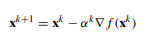

## Programación de los metodos

In [15]:
import numpy as np
from scipy import optimize

In [16]:
def f(x1,x2):
    return 0.06*np.exp(2*x1+x2) + 0.05*np.exp(x1-2*x2) + np.exp(-x1)  #Defino la función a minimizar

In [17]:
def grad(x1,x2): #Defino el gradiente de la función
    return np.array([0.12*np.exp(2*x1+x2) + 0.05*np.exp(x1-2*x2) - np.exp(-x1) , 
                     0.06*np.exp(2*x1+x2) - 0.1*np.exp(x1-2*x2)])

### Gradiente desendiente paso optimizado

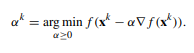

In [18]:
def gd1(x, f, grad, a, max_iter): #Gradiente desendiente paso optimizado
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x

  for i in range(max_iter):
    g = grad(x[0],x[1])
    def phi(s):
      return f(x[0]-s*g[0],x[1]-s*g[1])

    a = optimize.fminbound(phi, 0, 10)

    x = x - a * g
    xs[i+1,:] = x

    tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
    if tol < epsi:
      break
  return xs,i+1

### Gradiente desendiente paso fijo

In [19]:
def gd2(x, grad, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x
  for i in range(max_iter):
      x = x - a * grad(x[0],x[1])
      xs[i+1,:] = x
      #tolerancia: criterio de finalización
      tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
      if tol < epsi: #en caso tal de no encontrar un optimo finalizar con el algoritmo
        break
  return xs,i+1

## Ejecución del ejemplo

In [20]:
import matplotlib.pyplot as plt

### Gradiente desendiente paso optimizado

In [21]:
x = np.array([-0.5,2])
epsi = 0.001;
max_iter = 1000

In [22]:
res1 = gd1(x, f, grad, epsi, max_iter)
xs1 = res1[0]
i1 = res1[1]

0.6458865589505005 -0.028235701489804782


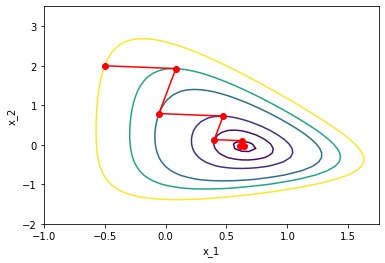

In [25]:
xx = np.linspace(-1, 1.75)
yy = np.linspace(-2, 3.5)
X, Y = np.meshgrid(xx, yy)
Z = 0.06*np.exp(2*X + Y) + 0.05*np.exp(X - 2*Y) + 1*np.exp(-X)
function = f(xs1[0:i1+1,0],xs1[0:i1+1,1])
c = plt.contour(X, Y, Z, np.flip(function))
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1],'-ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
print(xs1[i1,0],xs1[i1,1])
#se alcanza el mínimo en una menor cantidad de operaciones a el de paso fijo

Text(0, 0.5, 'f(x)')

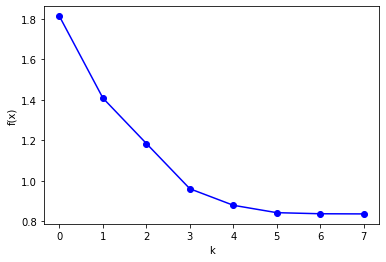

In [26]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

### Gradiente desendiente paso fijo



In [27]:
x = np.array([-0.5,2])
max_iter = 1000
epsi = 0.001; #tolerancia
a = 0.25 #tamaño de paso fijo

In [28]:
res2 = gd2(x, grad, a, max_iter,epsi)
xs2 = res2[0]
i2 = res2[1]

0.6205695430639326 0.0575397824479296


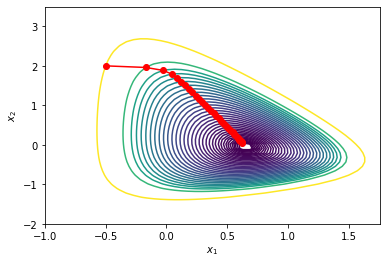

In [29]:
xx = np.linspace(-1, 1.75)
yy = np.linspace(-2, 3.5)
X, Y = np.meshgrid(xx, yy)
Z = 0.06*np.exp(2*X + Y) + 0.05*np.exp(X - 2*Y) + 1*np.exp(-X)
function = f(xs2[0:i2+1,0],xs2[0:i2+1,1])
c = plt.contour(X, Y, Z, np.flip(function))
plt.plot(xs2[0:i2+1,0],xs2[0:i2+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs2[i2,0],xs2[i2,1]) #imprimir los valores mínimos encontrados para x1 y x2

Text(0, 0.5, 'f(x)')

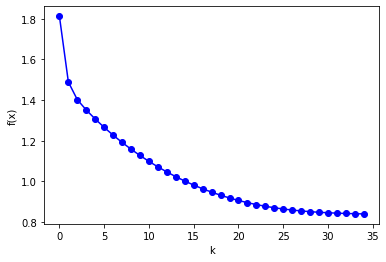

In [30]:
#graficamos los 16 pasos
plt.plot(f(xs2[0:i2+1,0],xs2[0:i2+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')